## Assess portfolio

In [89]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Getting the data (function)

In [90]:
def symbol_to_path(symbol, base_dir='../../data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

In [91]:
def get_data(symbols, dates, addSPY=True, colname = 'Adj Close'):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if addSPY and 'SPY' not in symbols: # add SPY for reference, if absent
        symbols = ['SPY'] + symbols

    for symbol in symbols:
        # Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = 'Date', 
                             parse_dates = True, usecols = ['Date', colname],
                             na_values = ['nan'])
    
        df_temp = df_temp.rename(columns = {colname: symbol})
        df = df.join(df_temp)
        
        if symbol == 'SPY': # drop dates SPY did not trade 
            df = df.dropna(subset=['SPY'])
            
    return df

### Plotting the data (function)

In [104]:
def plot_data(df, title = 'Stock Prices'):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title = title, fontsize = 10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

### Compute portfolio value (function)

In [93]:
def compute_portfolio_value(prices, allocs, start_val = 1000000):
    
    # fill nan values
    prices.fillna(method='ffill', inplace=True)
    prices.fillna(method='bfill', inplace=True)
    
    normed = prices / prices.ix[0, : ]
    alloced = normed * allocs
    pos_vals = alloced * start_val
    port_val = pos_vals.sum(axis = 1)
    
    return port_val

### Compute portfolio statistics (function)

In [94]:
def compute_portfolio_statistics(port_val, freq_sample = 252):
    
    # Compute daily returns
    daily_rets = port_val.copy()
    daily_rets[1:] = (port_val[1:] / port_val[:-1].values) - 1
    daily_rets[0] = 0
    daily_rets = daily_rets[1:]
    
    # compute cumulative returns
    cum_ret = (port_val[-1]/port_val[0]) - 1
    
    avg_daily_ret = daily_rets.mean()
    std_daily_ret = daily_rets.std()
    
    # Compute Sharpe ratio
    daily_rf = 0
    sr = (freq_sample**.5) * ((daily_rets - daily_rf).mean() / std_daily_ret)
    
    return(cum_ret, avg_daily_ret, std_daily_ret, sr)

### Reading and plotting data

In [95]:
start_date = dt.datetime(2009,1,1)  
end_date = dt.datetime(2010,1,1) 
dates = pd.date_range(start_date, end_date)
symbols = ['GOOG', 'AAPL', 'GLD', 'XOM'] 
prices_all = get_data(symbols, dates) # automatically adds SPY
prices = prices_all[symbols] # portfolio symbols
prices_SPY = prices_all['SPY'] # just SPY data

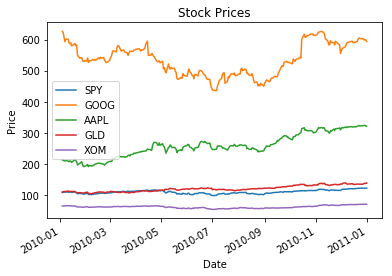

In [105]:
plot_data(prices_all)

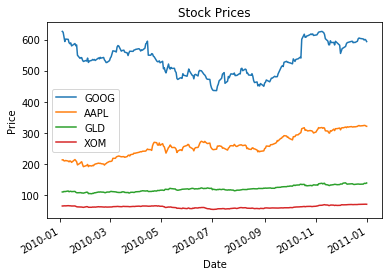

In [106]:
plot_data(prices)

### Portfolio value

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


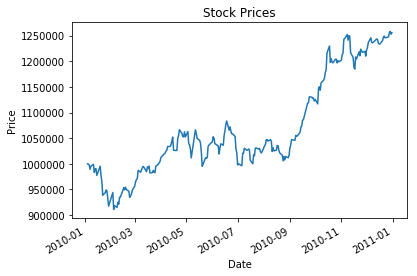

In [107]:
allocs = [0.2, 0.3, 0.4, 0.1]
port_val = compute_portfolio_value(prices, allocs, start_val = 1000000)
plot_data(port_val)

### Portfolio statistics

In [99]:
cum_ret, avg_daily_ret, std_daily_ret, sr = compute_portfolio_statistics(
    port_val, freq_sample = 252)

### Result 

In [100]:
print('Start Date:', start_date) 
print('End Date:', end_date)  
print('Symbols:', symbols)   
print('Allocations:', allocs)
print('Sharpe Ratio:', sr) 
print('Cumulative Return:', cum_ret)
print('Volatility (stdev of daily returns):', std_daily_ret)
print('Average Daily Return:', avg_daily_ret)

Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.7962213992867566
Cumulative Return: 0.6657866039618059
Volatility (stdev of daily returns): 0.011957732757447043
Average Daily Return: 0.0021062995152198423


### Example 1 

In [114]:
start_date = dt.datetime(2010,1,1)
end_date = dt.datetime(2010,12,31)
dates = pd.date_range(start_date, end_date)
Symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
prices_all = get_data(symbols, dates) # automatically adds SPY
prices = prices_all[symbols] # portfolio symbols
prices_SPY = prices_all['SPY'] # just SPY data

Allocs = [0.2, 0.3, 0.4, 0.1]
port_val = compute_portfolio_value(prices, allocs, start_val = 1000000)
cum_ret, avg_daily_ret, std_daily_ret, sr = compute_portfolio_statistics(
    port_val, freq_sample = 252)

print('Start Date:', start_date) 
print('End Date:', end_date)  
print('Symbols:', symbols)   
print('Allocations:', allocs)
print('Sharpe Ratio:', sr) 
print('Cumulative Return:', cum_ret)
print('Volatility (stdev of daily returns):', std_daily_ret)
print('Average Daily Return:', avg_daily_ret)

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.518192436412635
Cumulative Return: 0.25564678453350465
Volatility (stdev of daily returns): 0.010010402800015368
Average Daily Return: 0.0009573662342381413


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


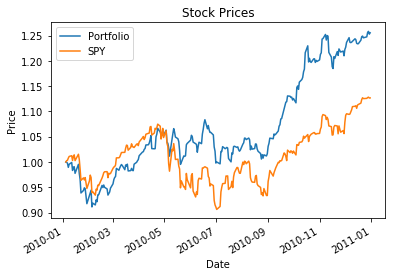

In [115]:
prices_SPY = prices_SPY / prices_SPY.ix[0, : ]
port_val = port_val / port_val.ix[0, : ]

df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
plot_data(df_temp)

### Example 2

In [113]:
start_date = dt.datetime(2010,1,1)
end_date = dt.datetime(2010,12,31)
dates = pd.date_range(start_date, end_date)
Symbols = ['AXP', 'HPQ', 'IBM', 'HNZ']
prices_all = get_data(symbols, dates) # automatically adds SPY
prices = prices_all[symbols] # portfolio symbols
prices_SPY = prices_all['SPY'] # just SPY data

Allocs = [0.0, 0.0, 0.0, 1.0]
port_val = compute_portfolio_value(prices, allocs, start_val = 1000000)
cum_ret, avg_daily_ret, std_daily_ret, sr = compute_portfolio_statistics(
    port_val, freq_sample = 252)

print('Start Date:', start_date) 
print('End Date:', end_date)  
print('Symbols:', symbols)   
print('Allocations:', allocs)
print('Sharpe Ratio:', sr) 
print('Cumulative Return:', cum_ret)
print('Volatility (stdev of daily returns):', std_daily_ret)
print('Average Daily Return:', avg_daily_ret)

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.518192436412635
Cumulative Return: 0.25564678453350465
Volatility (stdev of daily returns): 0.010010402800015368
Average Daily Return: 0.0009573662342381413


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Example 3

In [116]:
start_date = dt.datetime(2010,6,1)
end_date = dt.datetime(2010,12,31)
dates = pd.date_range(start_date, end_date)
Symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
prices_all = get_data(symbols, dates) # automatically adds SPY
prices = prices_all[symbols] # portfolio symbols
prices_SPY = prices_all['SPY'] # just SPY data

Allocs = [0.2, 0.3, 0.4, 0.1]
port_val = compute_portfolio_value(prices, allocs, start_val = 1000000)
cum_ret, avg_daily_ret, std_daily_ret, sr = compute_portfolio_statistics(
    port_val, freq_sample = 252)

print('Start Date:', start_date) 
print('End Date:', end_date)  
print('Symbols:', symbols)   
print('Allocations:', allocs)
print('Sharpe Ratio:', sr) 
print('Cumulative Return:', cum_ret)
print('Volatility (stdev of daily returns):', std_daily_ret)
print('Average Daily Return:', avg_daily_ret)

Start Date: 2010-06-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.2125976667229317
Cumulative Return: 0.20511393879215278
Volatility (stdev of daily returns): 0.009297346197073994
Average Daily Return: 0.0012958692436644658


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


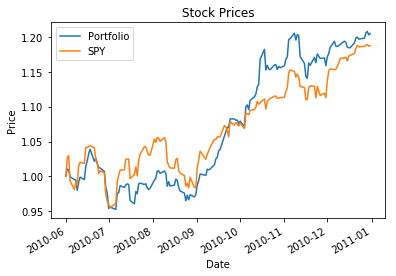

In [117]:
prices_SPY = prices_SPY / prices_SPY.ix[0, : ]
port_val = port_val / port_val.ix[0, : ]

df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
plot_data(df_temp)